  ###  About Project:  Used cars price predictions

#### Importing Packages

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  train_test_split, GridSearchCV
import xgboost

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

#### Importing Datset

In [3]:
df = pd.read_csv("Car_Sales_Data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Checking Cardinality of Variables
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [7]:
# Checking missing values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
# Removing Car_Name variable
df = df.iloc[:,1:]
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
# Creating a new variable with values of Car age (In Years)
df['car_age'] = 2023 - df['Year']
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [17]:
#Removing Year Column
df = df.iloc[:,1:]
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [18]:
## Plotting Histogram for Numerical datatypes

def hist_plot(x):
    sns.displot(x)
    plt.show()

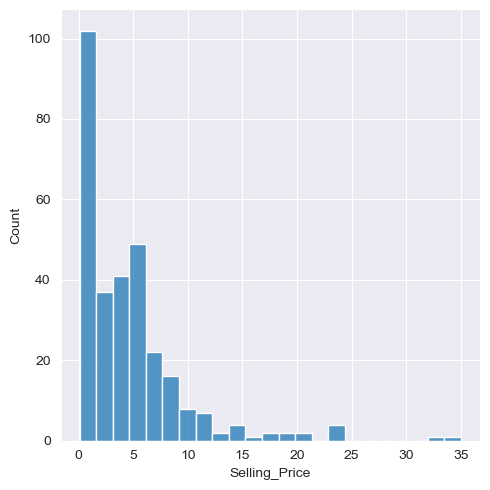

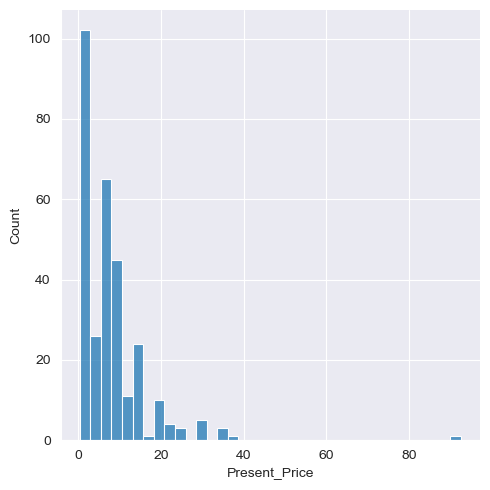

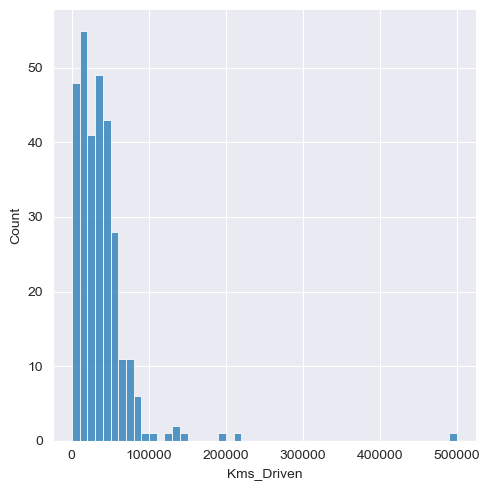

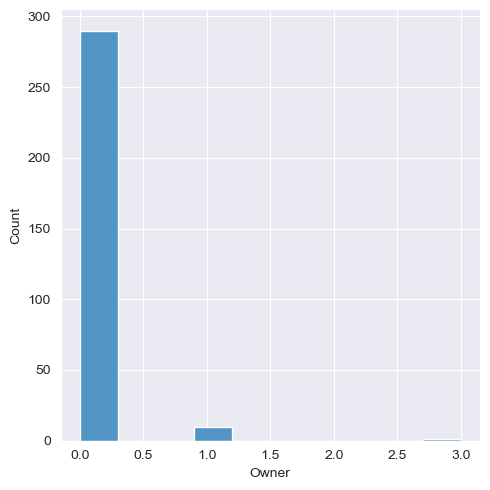

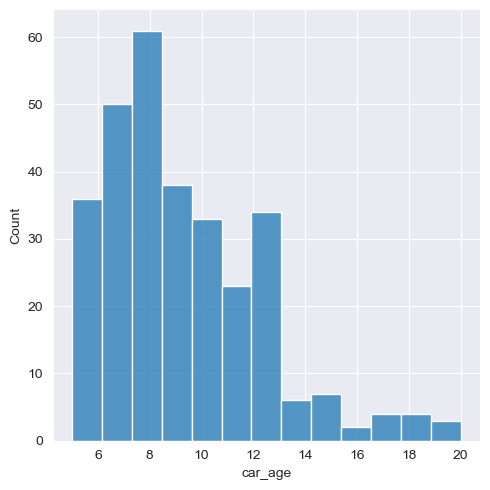

Selling_Price    None
Present_Price    None
Kms_Driven       None
Owner            None
car_age          None
dtype: object

In [19]:
df.select_dtypes('number').apply(hist_plot)

In [20]:
df.describe([0.01,0.05,0.95,0.99]).T

,count,mean,std,min,1%,5%,50%,95%,99%,max
Selling_Price,301.0,4.661296,5.082812,0.10,0.16,0.25,3.6,14.50,23.00,35.0
Present_Price,301.0,7.628472,8.644115,0.32,0.51,0.54,6.4,22.78,35.96,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,1200.00,3500.00,32000.0,80000.00,142000.00,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.00,0.00,0.0,0.00,1.00,3.0
car_age,301.0,9.372093,2.891554,5.00,6.00,6.00,9.0,15.00,18.00,20.0


In [30]:
### Checking Cardinality details

print("Cardinality and unique records for categorical columns are as: \n")
for i in df.select_dtypes('O').columns:
    print(i, ' : ', df[i].nunique(), ' - ', df[i].unique())

Cardinality and unique records for categorical columns are as: 

Fuel_Type  :  3  -  ['Petrol' 'Diesel' 'CNG']
Seller_Type  :  2  -  ['Dealer' 'Individual']
Transmission  :  2  -  ['Manual' 'Automatic']


In [35]:
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform( df['Fuel_Type'])
df['Seller_Type'] = le.fit_transform( df['Seller_Type'])
df['Transmission'] = le.fit_transform( df['Transmission'])
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9


In [39]:
df.corr()['Selling_Price']

Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Fuel_Type       -0.509467
Seller_Type     -0.550724
Transmission    -0.367128
Owner           -0.088344
car_age         -0.236141
Name: Selling_Price, dtype: float64

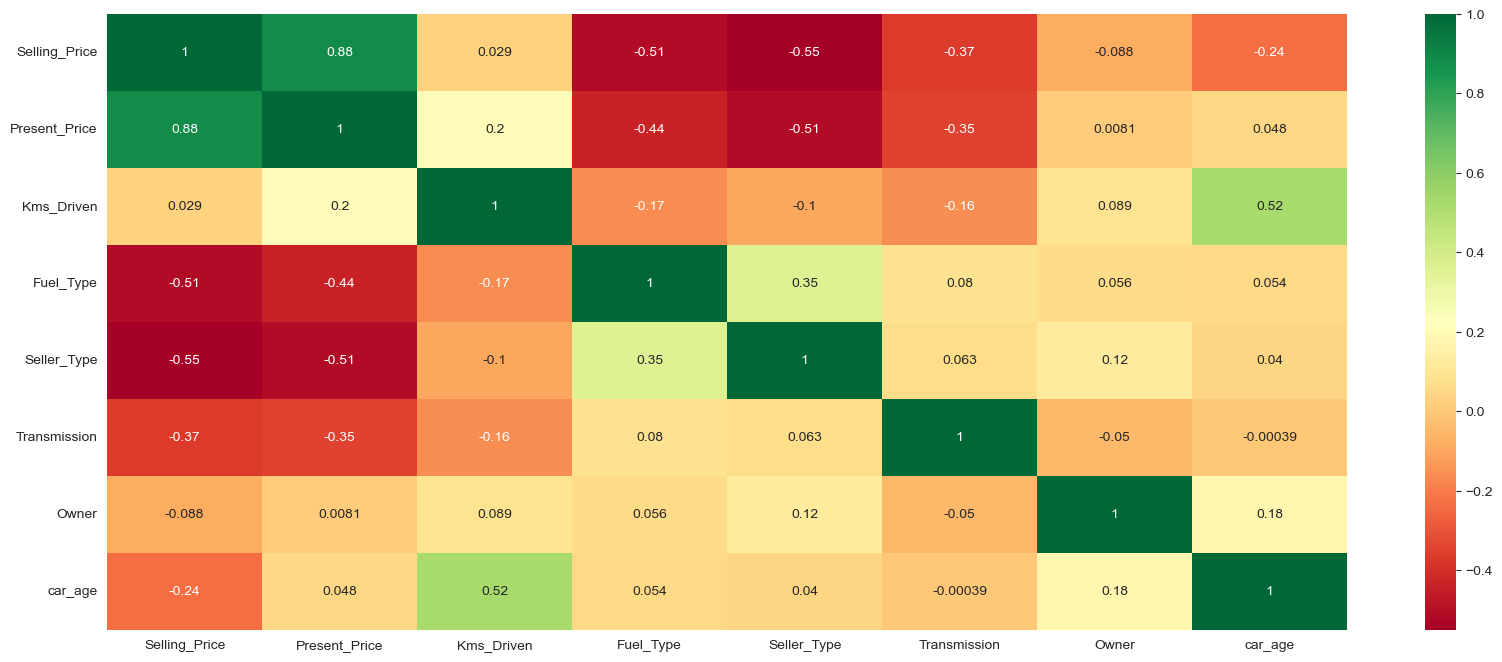

In [40]:
# Plotting Heatmap for checking Co relation among independent variables
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap = 'RdYlGn')
plt.show()

In [41]:
# Splitting into X and y variables
X = df.drop(columns='Selling_Price')
y = df['Selling_Price']

In [42]:
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 7)
(61, 7)
(240,)
(61,)


In [46]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

xg = xgboost.XGBRegressor()
xg.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [47]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xg = xg.predict(X_test)

In [50]:
def model_accuracy(y_true, model):
    print(model, " : ", "MAPE for test data is: ", mean_absolute_percentage_error(y_test, model.predict(X_test)))
    print(model, " : ", "R2 score for test data is: ", r2_score(y_test, model.predict(X_test)))

In [51]:
model_accuracy(y_test,lr)

LinearRegression()  :  MAPE for test data is:  1.2451070928405814
LinearRegression()  :  R2 score for test data is:  0.825043339494701


In [52]:
model_accuracy(y_test,rf)

RandomForestRegressor()  :  MAPE for test data is:  0.18768111750564098
RandomForestRegressor()  :  R2 score for test data is:  0.9050171793328354


In [53]:
model_accuracy(y_test,xg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)  :  MAPE for test data is:  0.2249293245154479
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categori

#### We can see RandomForest Regressor model is giving good score

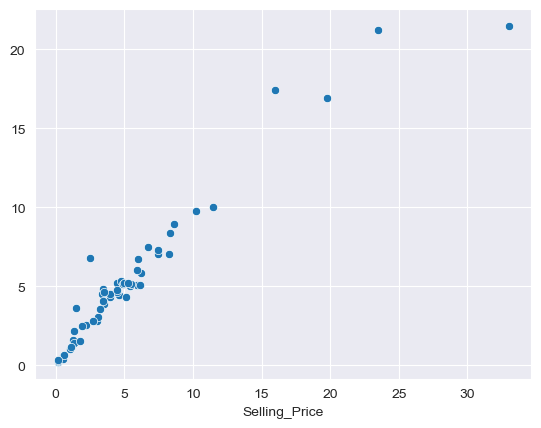

In [54]:
sns.scatterplot(y_test, y_pred_rf)
plt.show()

In [55]:
import pickle

pickle.dump(rf, open('model.pkl','wb'))